Análise da Situação dos Municípios Brasileiros quanto ao cumprimento dos itens avaliados pela Lei de Responsabilidade Fiscal

Análise e Exploração de Dados

1) Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime 
from datetime import timedelta
import time
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans as kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as silhouette
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as sk_metrics
import itertools

2) Leitura do dataset gerado

In [2]:
dfr_fpm=pd.read_csv('C:\TCC\DATASET\dfr_fpm.csv',sep=',')
dfr_fpm.replace(np.nan,0,inplace=True)
print('Total de registros:{0}'.format(len(dfr_fpm)))
dfr_fpm.head()

Total de registros:5569


,cod_mun_ent,uf,nom_municipio_x,1.1,1.3,1.4,1.5,2.1.1,2.1.2,3.1,...,4.3,4.4,qtd_2018_x,Região,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores,sit_obr
0,520005.0,GO,Abadia de Goi�s,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,8583,CO,0.708,0.687,1.9967,0.665567,0.9063,1.0
1,310010.0,MG,Abadia dos Dourados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6972,SE,0.689,0.693,1.8503,0.616767,0.7747,0.0
2,520010.0,GO,Abadi�nia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,19614,CO,0.689,0.671,2.9462,0.982067,0.9592,0.0
3,310020.0,MG,Abaet�,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23223,SE,0.698,0.720,1.3460,0.448667,0.3102,0.0
4,150010.0,PA,Abaetetuba,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,2.0,156292,N,0.628,0.579,0.0000,0.000000,0.0000,2.0


3) Distribuição das Classes

A) Situação da Regularidade x Número de Municípios

Text(0.5, 0, 'Situação')

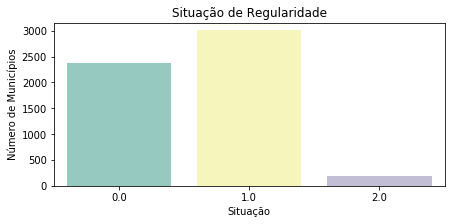

In [3]:
plt.figure(figsize=(7, 3))
sb.countplot(x ='sit_obr', data = dfr_fpm, palette = "Set3")
plt.title('Situação de Regularidade')
plt.ylabel('Número de Municípios')
plt.xlabel('Situação')

In [4]:
dfr_fpm.sit_obr.value_counts()

1.0    3007
0.0    2369
2.0     193
Name: sit_obr, dtype: int64

B) Regularidade por Região

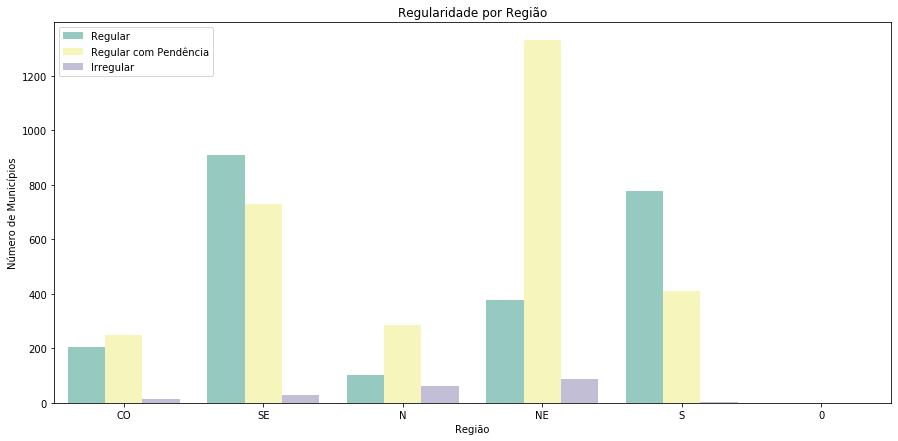

In [5]:
plt.figure(figsize=(15, 7))
sb.countplot(x ='Região', hue='sit_obr', data = dfr_fpm, palette = "Set3")
plt.title('Regularidade por Região')
plt.ylabel('Número de Municípios')
plt.legend(['Regular', 'Regular com Pendência', 'Irregular'])

In [6]:
var_group = 'sit_obr' #<-- Varivel que vc deseja agrupar
var_count = 'Região' #<---Variavel que vc quer contar
dfr_fpm_r1 = dfr_fpm[dfr_fpm['Região']=='CO']   #<---Trocar pelo respectivo valor que deseja filtrar
print('Total de registros da Região Centro Oeste')
dfr_fpm_r1[var_group].value_counts()

Total de registros da Região Centro Oeste


1.0    250
0.0    203
2.0     13
Name: sit_obr, dtype: int64

In [7]:
var_group = 'sit_obr' #<-- Varivel que vc deseja agrupar
var_count = 'Região' #<---Variavel que vc quer contar
dfr_fpm_r1 = dfr_fpm[dfr_fpm['Região']=='SE']   #<---Trocar pelo respectivo valor que deseja filtrar
print('Total de registros da Região Sudeste')
dfr_fpm_r1[var_group].value_counts()

Total de registros da Região Sudeste


0.0    909
1.0    731
2.0     28
Name: sit_obr, dtype: int64

In [8]:
var_group = 'sit_obr' #<-- Varivel que vc deseja agrupar
var_count = 'Região' #<---Variavel que vc quer contar
dfr_fpm_r1 = dfr_fpm[dfr_fpm['Região']=='N']   #<---Trocar pelo respectivo valor que deseja filtrar
print('Total de registros da Região Norte')
dfr_fpm_r1[var_group].value_counts()

Total de registros da Região Norte


1.0    286
0.0    101
2.0     63
Name: sit_obr, dtype: int64

In [9]:
var_group = 'sit_obr' #<-- Varivel que vc deseja agrupar
var_count = 'Região' #<---Variavel que vc quer contar
dfr_fpm_r1 = dfr_fpm[dfr_fpm['Região']=='NE']   #<---Trocar pelo respectivo valor que deseja filtrar
print('Total de registros da Região Nordeste')
dfr_fpm_r1[var_group].value_counts()

Total de registros da Região Nordeste


1.0    1330
0.0     376
2.0      87
Name: sit_obr, dtype: int64

In [10]:
var_group = 'sit_obr' #<-- Varivel que vc deseja agrupar
var_count = 'Região' #<---Variavel que vc quer contar
dfr_fpm_r1 = dfr_fpm[dfr_fpm['Região']=='S']   #<---Trocar pelo respectivo valor que deseja filtrar
print('Total de registros da Região Sul')
dfr_fpm_r1[var_group].value_counts()

Total de registros da Região Sul


0.0    779
1.0    410
2.0      2
Name: sit_obr, dtype: int64

C) Regularidade por Estado

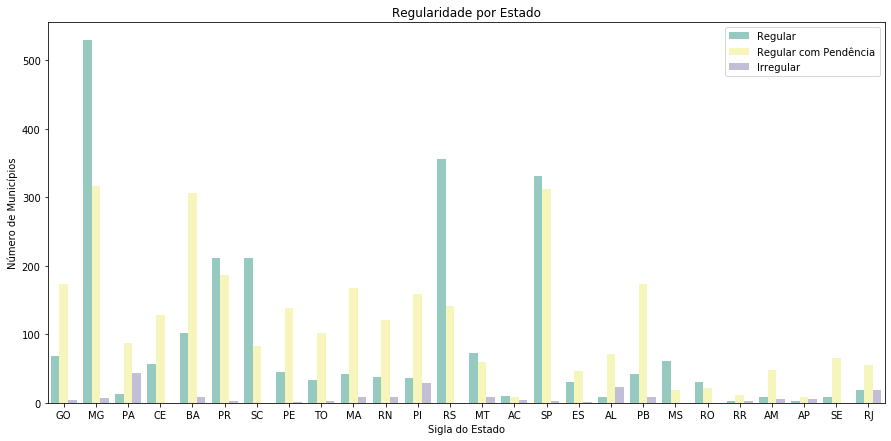

In [11]:
plt.figure(figsize=(15, 7))
sb.countplot(x ='uf', hue='sit_obr', data = dfr_fpm,  palette = "Set3")
plt.title('Regularidade por Estado')
plt.ylabel('Número de Municípios')
plt.xlabel('Sigla do Estado')
plt.legend(['Regular', 'Regular com Pendência', 'Irregular'])

D) População por Estado

Text(0.5, 0, 'Sigla do Estado')

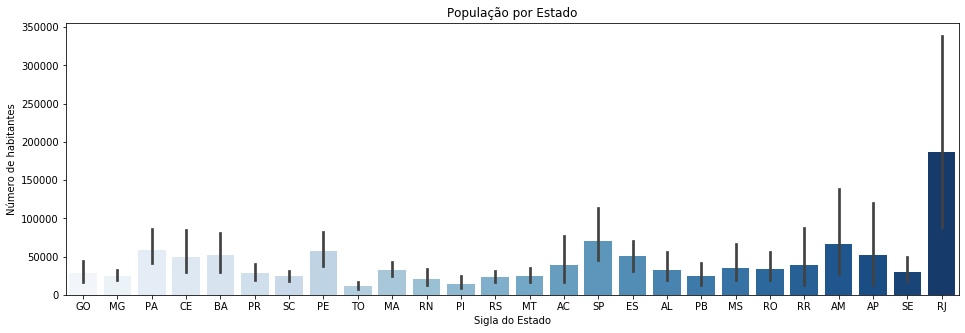

In [12]:
plt.figure(figsize=(16, 5))
sb.barplot(x='uf',y='qtd_2018_x', data=dfr_fpm, palette = "Blues")
plt.title('População por Estado')
plt.ylabel('Número de habitantes')
plt.xlabel('Sigla do Estado')

E) Distribuição IDHM por Regularidade

Text(0.5, 6.79999999999999, 'Situação')

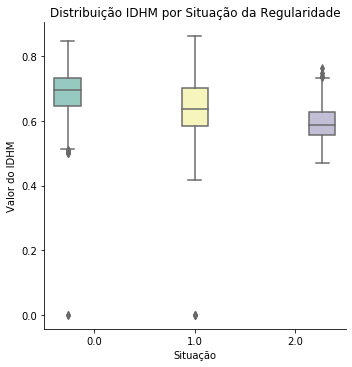

In [13]:
sb.catplot(x='sit_obr', y= 'idhm', hue='sit_obr', kind="box", data=dfr_fpm, palette = "Set3")
plt.title('Distribuição IDHM por Situação da Regularidade')
plt.ylabel('Valor do IDHM')
plt.xlabel('Situação')

F) Distribuição IDHM-Renda por Regularidade

Text(0.5, 6.79999999999999, 'Situação')

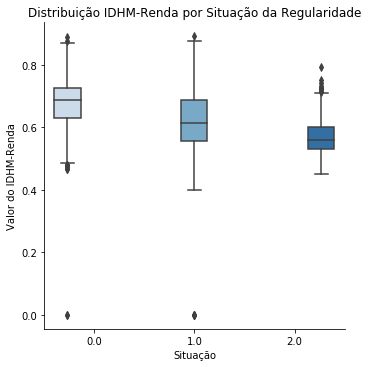

In [14]:
sb.catplot(x='sit_obr', y= 'idhm_renda', hue='sit_obr', kind="box", data=dfr_fpm, palette = "Blues")
plt.title('Distribuição IDHM-Renda por Situação da Regularidade')
plt.ylabel('Valor do IDHM-Renda')
plt.xlabel('Situação')

G) IDHM - Municípios Regulares, Com Pendências e Irregulares por Estado

C:\Users\Rena\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 20.799999999999983, 'Estado')

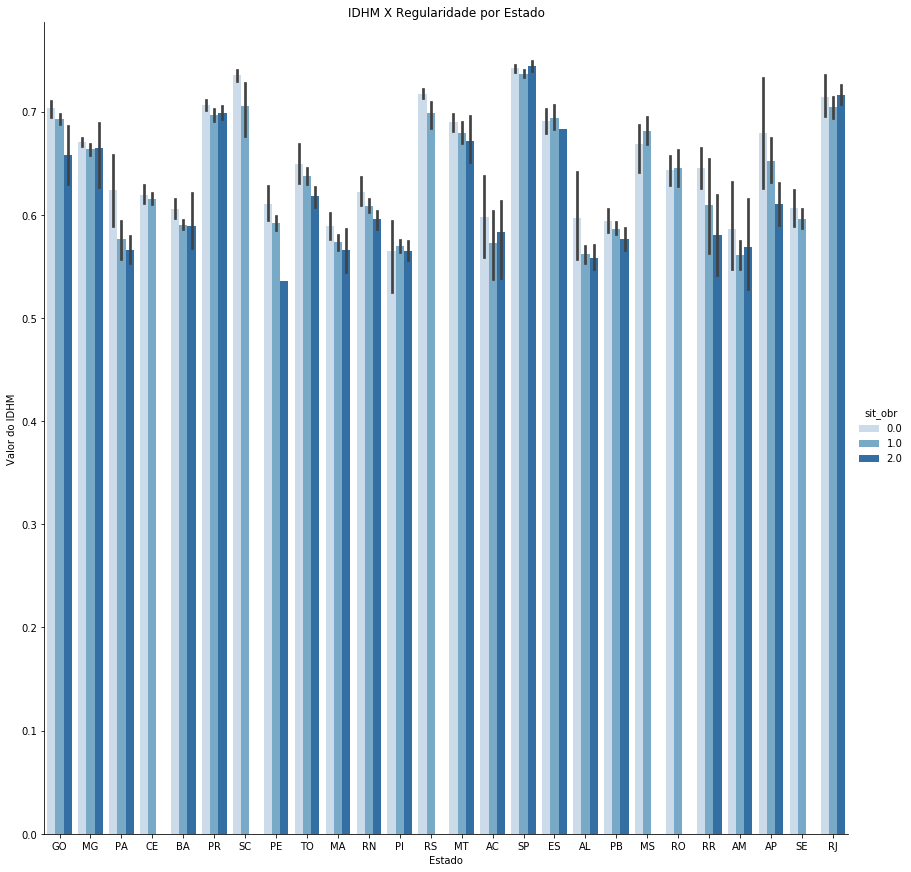

In [15]:
sb.catplot(x='uf', y='idhm', hue='sit_obr', kind="bar", data=dfr_fpm, size=12, palette = "Blues")
plt.title('IDHM X Regularidade por Estado')
plt.ylabel('Valor do IDHM')
plt.xlabel('Estado')

4) Análise Descritiva

A) Regulares

In [16]:
dfr_fpm_reg = dfr_fpm[dfr_fpm['sit_obr'] ==0] 
print('Total de municípios regulares:{0}'.format(len(dfr_fpm_reg)))
dfr_fpm_reg[['qtd_2018_x','idhm','idhm_renda','soma_capag','media_indicadores','mediana_indicadores']].describe()

Total de municípios regulares:2369


,qtd_2018_x,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores
count,2.369000e+03,2369.000000,2369.000000,2.369000e+03,2.369000e+03,2369.000000
mean,4.594455e+04,0.686279,0.674730,8.127191e+12,2.709064e+12,0.528008
std,3.129288e+05,0.065502,0.073814,2.631204e+14,8.770679e+13,4.622470
min,1.171000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.819000e+03,0.645000,0.630000,1.019000e+00,3.396667e-01,0.085900
50%,1.078600e+04,0.697000,0.688000,1.314900e+00,4.383000e-01,0.292100
75%,2.481200e+04,0.733000,0.727000,2.186800e+00,7.289333e-01,0.854200
max,1.217687e+07,0.847000,0.887000,9.130442e+15,3.043481e+15,224.272300


B) Regulares com pendência

In [17]:
dfr_fpm_reg = dfr_fpm[dfr_fpm['sit_obr']==1]
print('Total de entes em situação regular com pendência:{0}'.format(len(dfr_fpm_reg)))
dfr_fpm_reg[['qtd_2018_x','idhm','idhm_renda','soma_capag','media_indicadores','mediana_indicadores']].describe()

Total de entes em situação regular com pendência:3007


,qtd_2018_x,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores
count,3.007000e+03,3007.000000,3007.000000,3.007000e+03,3.007000e+03,3007.000000
mean,3.304797e+04,0.640337,0.620656,3.787577e+12,1.262526e+12,0.482514
std,1.318312e+05,0.075105,0.081775,2.076960e+14,6.923200e+13,0.820392
min,7.860000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.846500e+03,0.583000,0.557000,9.865500e-01,3.288500e-01,0.046650
50%,1.213900e+04,0.636000,0.614000,1.471700e+00,4.905667e-01,0.329300
75%,2.531450e+04,0.701000,0.688000,3.039300e+00,1.013100e+00,0.920400
max,4.270614e+06,0.862000,0.891000,1.138924e+16,3.796414e+15,36.536200


C) Irregulares

In [18]:
dfr_fpm_irr = dfr_fpm[dfr_fpm['sit_obr']==2]
print('Total de entes em situação irregular:{0}'.format(len(dfr_fpm_irr)))
dfr_fpm_irr[['qtd_2018_x','idhm','idhm_renda','soma_capag','media_indicadores','mediana_indicadores']].describe()

Total de entes em situação irregular:193


,qtd_2018_x,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,33841.160622,0.598430,0.577358,0.495040,0.165013,0.066003
std,61792.951033,0.063838,0.068563,1.550071,0.516690,0.230858
min,1609.000000,0.471000,0.452000,0.000000,0.000000,0.000000
25%,7319.000000,0.557000,0.530000,0.000000,0.000000,0.000000
50%,16136.000000,0.586000,0.560000,0.000000,0.000000,0.000000
75%,32018.000000,0.628000,0.602000,0.027100,0.009033,0.000000
max,503424.000000,0.764000,0.792000,11.486100,3.828700,1.541400


5) Distribuição da média dos indicadores (Capacidade de Pagamento) por Situação de Regularidade

Text(0.5, 0, 'Média dos Indicadores')

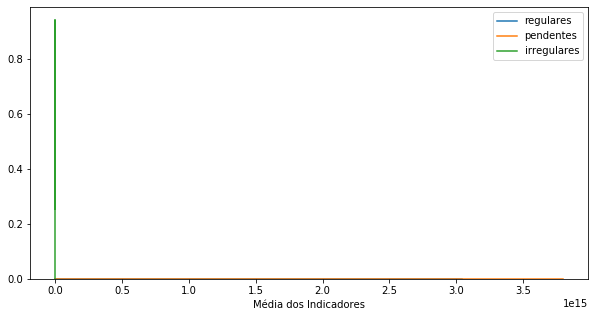

In [19]:
plt.figure(figsize=(10,5))         

x0 = dfr_fpm.loc[dfr_fpm['sit_obr']==0,'media_indicadores']
x1 = dfr_fpm.loc[dfr_fpm['sit_obr']==1,'media_indicadores']
x2 = dfr_fpm.loc[dfr_fpm['sit_obr']==2,'media_indicadores']

sb.kdeplot(x0,label='regulares', shade=True)
sb.kdeplot(x1,label='pendentes', shade=True)
sb.kdeplot(x2,label='irregulares', shade=True)

plt.xlabel('Média dos Indicadores')

A) Para Entes Regulares

Text(0.5, 0, 'Regulares - Média dos Indicadores')

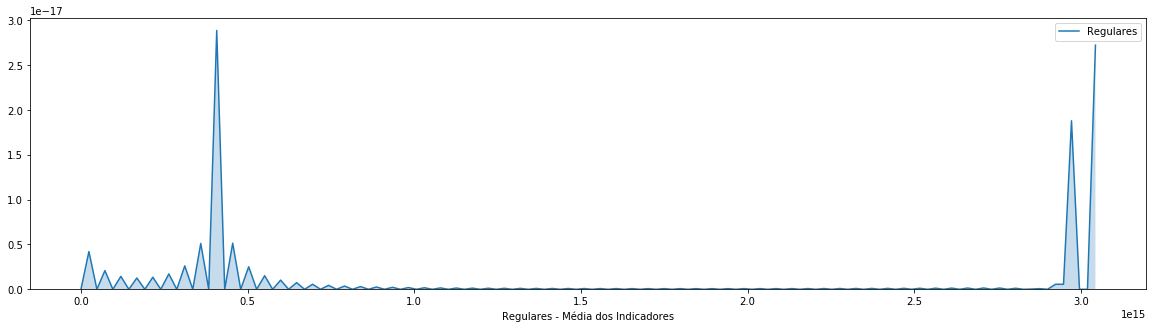

In [20]:
plt.figure(figsize=(20,5))                         
sb.kdeplot(dfr_fpm.media_indicadores[dfr_fpm.sit_obr==0], label='Regulares', shade=True)
plt.xlabel('Regulares - Média dos Indicadores')

B) Para Entes Regulares com Pendências

Text(0.5, 0, 'Regulares com pendência - Média dos Indicadores')

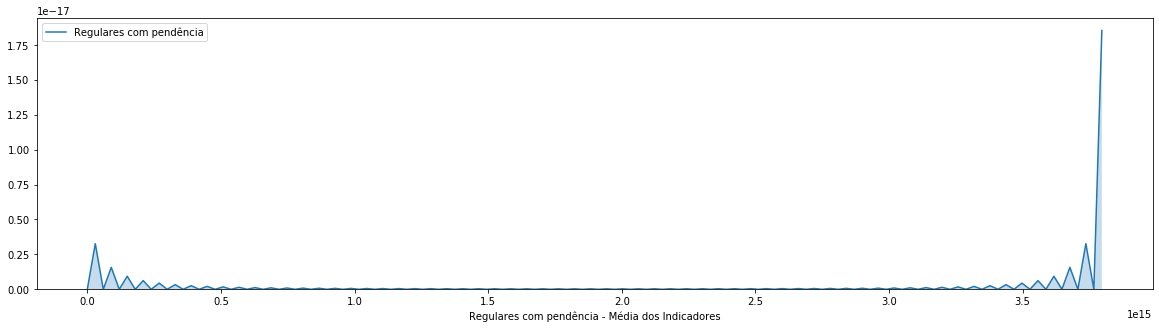

In [21]:
plt.figure(figsize=(20,5))                         
sb.kdeplot(dfr_fpm.media_indicadores[dfr_fpm.sit_obr==1], label='Regulares com pendência', shade=True)
plt.xlabel('Regulares com pendência - Média dos Indicadores')

C) Para Entes Irregulares

Text(0.5, 0, 'Irregulares - Média dos Indicadores')

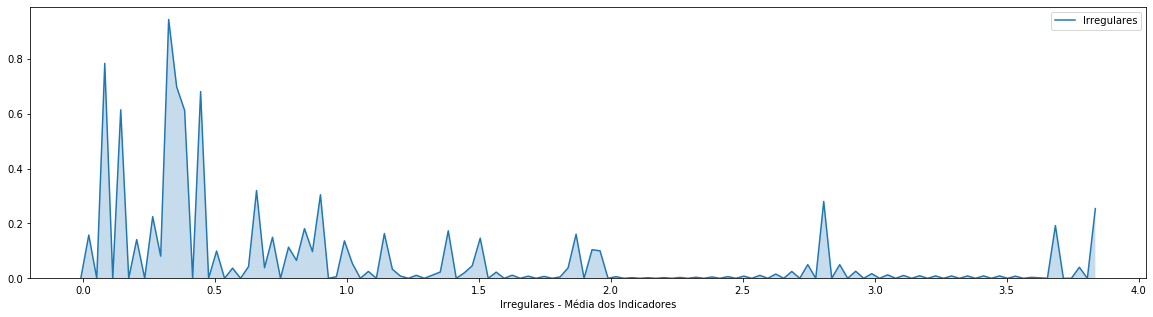

In [22]:
plt.figure(figsize=(20,5))                         
sb.kdeplot(dfr_fpm.media_indicadores[dfr_fpm.sit_obr==2], label='Irregulares', shade=True)
plt.xlabel('Irregulares - Média dos Indicadores')

6) Correlações - Pearson e Spearman

A) Método de Pearson

In [23]:
dfr_fpm.corr(method ='pearson')

,cod_mun_ent,1.1,1.3,1.4,1.5,2.1.1,2.1.2,3.1,3.2.2,3.2.3,...,4.2,4.3,4.4,qtd_2018_x,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores,sit_obr
cod_mun_ent,1.000000,-0.336930,-0.140605,-0.014202,-0.332442,-0.174538,-0.127671,-0.173870,-0.169721,-0.200989,...,-0.148265,-0.020863,0.022814,-0.010298,0.570700,0.614259,0.022607,0.022607,-0.025684,-0.282734
1.1,-0.336930,1.000000,0.271821,0.036832,0.621087,0.254662,0.185743,0.246765,0.205362,0.306210,...,0.265908,0.007073,0.098656,-0.011317,-0.370005,-0.367962,-0.012331,-0.012331,-0.006038,0.498805
1.3,-0.140605,0.271821,1.000000,0.037604,0.323752,0.137410,0.057061,0.156249,0.160726,0.152318,...,0.170834,0.028867,0.080541,-0.006849,-0.126754,-0.121599,-0.005698,-0.005698,-0.007612,0.265439
1.4,-0.014202,0.036832,0.037604,1.000000,0.036360,-0.006287,-0.004703,-0.008629,-0.008366,0.025104,...,-0.005775,-0.000440,0.025718,0.004974,-0.009698,-0.007661,-0.000454,-0.000454,-0.000785,0.013358
1.5,-0.332442,0.621087,0.323752,0.036360,1.000000,0.278603,0.196747,0.229691,0.211055,0.280512,...,0.276443,0.025656,0.128433,0.009424,-0.319176,-0.328484,-0.012491,-0.012491,-0.006863,0.504881
2.1.1,-0.174538,0.254662,0.137410,-0.006287,0.278603,1.000000,0.203053,0.131055,0.123626,0.161920,...,0.187776,-0.007701,0.125953,-0.005274,-0.207828,-0.215838,-0.007948,-0.007948,-0.000579,0.339993
2.1.2,-0.127671,0.185743,0.057061,-0.004703,0.196747,0.203053,1.000000,0.115210,0.102600,0.135348,...,0.139340,-0.005761,0.068643,-0.008461,-0.147801,-0.157039,-0.005946,-0.005946,-0.004629,0.251089
3.1,-0.173870,0.246765,0.156249,-0.008629,0.229691,0.131055,0.115210,1.000000,0.643408,0.379153,...,0.281498,0.009953,0.116841,-0.034335,-0.200476,-0.204057,0.012710,0.012710,-0.026640,0.483171
3.2.2,-0.169721,0.205362,0.160726,-0.008366,0.211055,0.123626,0.102600,0.643408,1.000000,0.459238,...,0.273537,0.031651,0.115469,-0.031033,-0.182759,-0.181621,-0.010576,-0.010576,-0.027259,0.471514
3.2.3,-0.200989,0.306210,0.152318,0.025104,0.280512,0.161920,0.135348,0.379153,0.459238,1.000000,...,0.363329,0.014656,0.113096,-0.030720,-0.239066,-0.240982,-0.018092,-0.018092,-0.017711,0.661433


In [24]:
cols=['qtd_2018_x','idhm', 'idhm_renda','media_indicadores','mediana_indicadores','sit_obr']
dfr_fpm[cols].corr(method ='pearson')

,qtd_2018_x,idhm,idhm_renda,media_indicadores,mediana_indicadores,sit_obr
qtd_2018_x,1.000000,0.123517,0.132745,-0.003098,0.005001,-0.026342
idhm,0.123517,1.000000,0.951441,0.012230,-0.023421,-0.334461
idhm_renda,0.132745,0.951441,1.000000,0.016123,-0.026792,-0.348751
media_indicadores,-0.003098,0.012230,0.016123,1.000000,-0.002905,-0.010269
mediana_indicadores,0.005001,-0.023421,-0.026792,-0.002905,1.000000,-0.018690
sit_obr,-0.026342,-0.334461,-0.348751,-0.010269,-0.018690,1.000000


(6.0, 0.0)

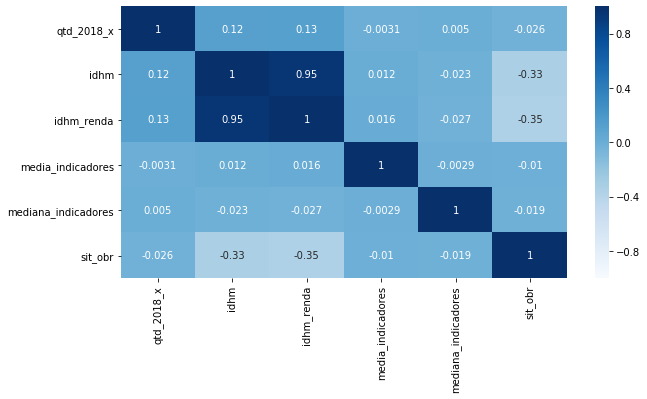

In [25]:
plt.figure(figsize=(10,5))
ax = sb.heatmap(dfr_fpm[cols].corr('pearson'),vmin=-1, vmax=1, annot=True, cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

B) Método de Spearman 

In [26]:
dfr_fpm.corr(method ='spearman')

,cod_mun_ent,1.1,1.3,1.4,1.5,2.1.1,2.1.2,3.1,3.2.2,3.2.3,...,4.2,4.3,4.4,qtd_2018_x,idhm,idhm_renda,soma_capag,media_indicadores,mediana_indicadores,sit_obr
cod_mun_ent,1.000000,-0.370012,-0.151312,-0.017219,-0.357171,-0.195836,-0.142585,-0.183072,-0.176431,-0.220021,...,-0.150250,-0.017474,0.012984,-0.166467,0.670483,0.710347,-0.075879,-0.075880,-0.048067,-0.311350
1.1,-0.370012,1.000000,0.271821,0.036832,0.621087,0.254662,0.185743,0.246765,0.205362,0.306210,...,0.265908,0.007073,0.098656,0.080052,-0.384097,-0.378615,-0.020990,-0.020990,-0.043040,0.483887
1.3,-0.151312,0.271821,1.000000,0.037604,0.323752,0.137410,0.057061,0.156249,0.160726,0.152318,...,0.170834,0.028867,0.080541,0.031817,-0.133566,-0.128215,-0.063407,-0.063407,-0.061817,0.245630
1.4,-0.017219,0.036832,0.037604,1.000000,0.036360,-0.006287,-0.004703,-0.008629,-0.008366,0.025104,...,-0.005775,-0.000440,0.025718,0.027612,-0.011407,-0.009438,-0.003485,-0.003485,-0.001797,0.014661
1.5,-0.357171,0.621087,0.323752,0.036360,1.000000,0.278603,0.196747,0.229691,0.211055,0.280512,...,0.276443,0.025656,0.128433,0.138782,-0.333833,-0.341607,-0.034371,-0.034371,-0.043035,0.489920
2.1.1,-0.195836,0.254662,0.137410,-0.006287,0.278603,1.000000,0.203053,0.131055,0.123626,0.161920,...,0.187776,-0.007701,0.125953,0.059994,-0.220362,-0.226313,0.005989,0.005989,0.000771,0.323552
2.1.2,-0.142585,0.185743,0.057061,-0.004703,0.196747,0.203053,1.000000,0.115210,0.102600,0.135348,...,0.139340,-0.005761,0.068643,0.043313,-0.148871,-0.157844,-0.008380,-0.008381,-0.022010,0.239990
3.1,-0.183072,0.246765,0.156249,-0.008629,0.229691,0.131055,0.115210,1.000000,0.643408,0.379153,...,0.281498,0.009953,0.116841,-0.056393,-0.203000,-0.209112,-0.186033,-0.186033,-0.202017,0.454493
3.2.2,-0.176431,0.205362,0.160726,-0.008366,0.211055,0.123626,0.102600,0.643408,1.000000,0.459238,...,0.273537,0.031651,0.115469,-0.017035,-0.186672,-0.189404,-0.190108,-0.190107,-0.208789,0.442579
3.2.3,-0.220021,0.306210,0.152318,0.025104,0.280512,0.161920,0.135348,0.379153,0.459238,1.000000,...,0.363329,0.014656,0.113096,0.045753,-0.245213,-0.249394,-0.071623,-0.071623,-0.104820,0.665551


In [27]:
cols=['qtd_2018_x','idhm', 'idhm_renda','media_indicadores','mediana_indicadores','sit_obr']
dfr_fpm[cols].corr(method ='spearman')

,qtd_2018_x,idhm,idhm_renda,media_indicadores,mediana_indicadores,sit_obr
qtd_2018_x,1.000000,0.076297,0.081622,0.085106,0.108304,0.057533
idhm,0.076297,1.000000,0.949107,-0.092112,-0.051814,-0.343522
idhm_renda,0.081622,0.949107,1.000000,-0.105885,-0.063788,-0.359163
media_indicadores,0.085106,-0.092112,-0.105885,1.000000,0.882927,-0.056768
mediana_indicadores,0.108304,-0.051814,-0.063788,0.882927,1.000000,-0.086152
sit_obr,0.057533,-0.343522,-0.359163,-0.056768,-0.086152,1.000000


(6.0, 0.0)

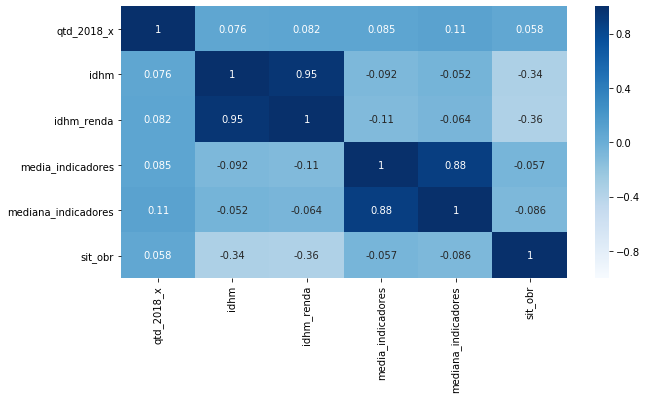

In [28]:
plt.figure(figsize=(10,5))
ax = sb.heatmap(dfr_fpm[cols].corr('spearman'),vmin=-1, vmax=1, annot=True,cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)